In [2]:
import pandas as pd
data = pd.read_csv("./CA_housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

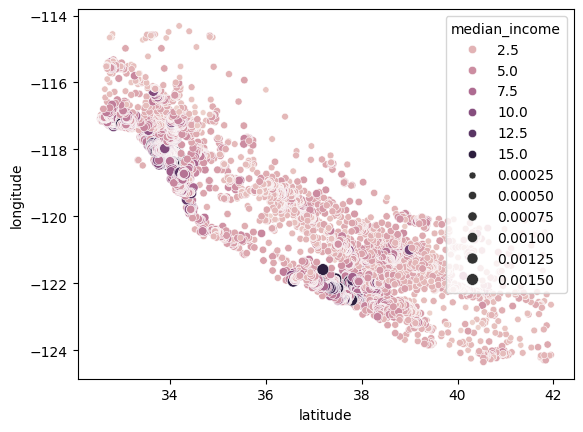

In [15]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=data, hue='median_income', size=data["median_income"] / 10000)

In [16]:
data.loc[:, ['latitude', 'longitude', 'median_income']]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [29]:
from sklearn.cluster import KMeans

x = data.loc[:, ['latitude', 'longitude', 'median_income']]
model = KMeans(n_clusters=6)
predictions = model.fit_predict(x)



In [19]:
predictions.shape

(20640,)

In [30]:
x['segmento_economico'] = predictions
x.segmento_economico.value_counts()

segmento_economico
0    6561
2    4883
3    4204
1    2764
5    1677
4     551
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

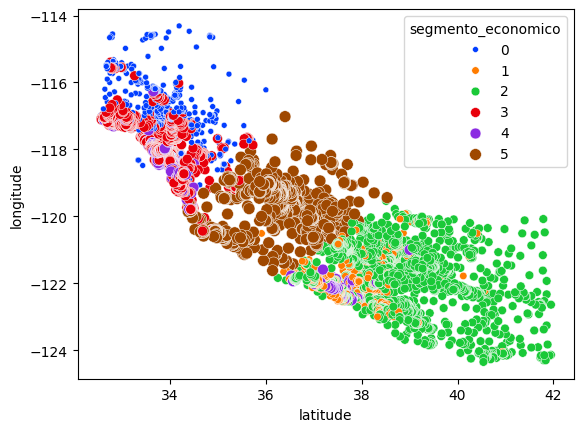

In [32]:
sb.scatterplot(x='latitude', y='longitude', data=x, hue='segmento_economico', palette='bright', size='segmento_economico')

<Axes: xlabel='segmento_economico', ylabel='count'>

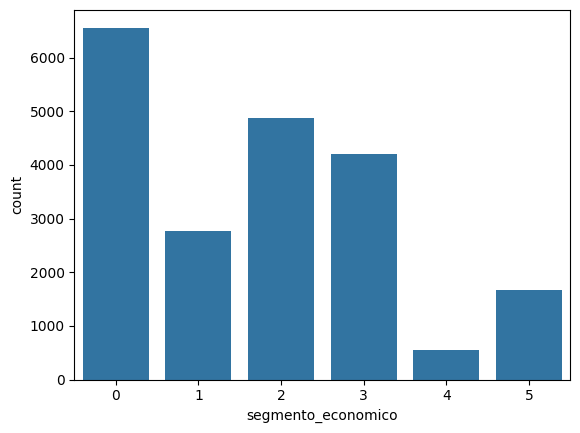

In [33]:
sb.countplot(x='segmento_economico', data=x)

In [35]:
x.groupby(['segmento_economico'])['median_income'].mean()

segmento_economico
0     2.788111
1     5.524420
2     2.824459
3     5.303366
4    10.488034
5     2.660862
Name: median_income, dtype: float64

In [38]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
new_data = data
new_data = new_data.drop(["population", "households"], axis=1)

new_data['pop_per_household'] = data['population'].div(data['households'])
new_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,pop_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,3.870671,206855.816909,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1.899822,115395.615874,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,0.499900,14999.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,2.563400,119600.000000,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,3.534800,179700.000000,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,4.743250,264725.000000,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,15.000100,500001.000000,1243.333333


In [55]:
from sklearn.cluster import KMeans

x2 = data.loc[:, ['latitude', 'longitude', 'pop_per_household']]
model = KMeans(n_clusters=6)
predictions2 = model.fit_predict(x2)

<Axes: xlabel='latitude', ylabel='longitude'>

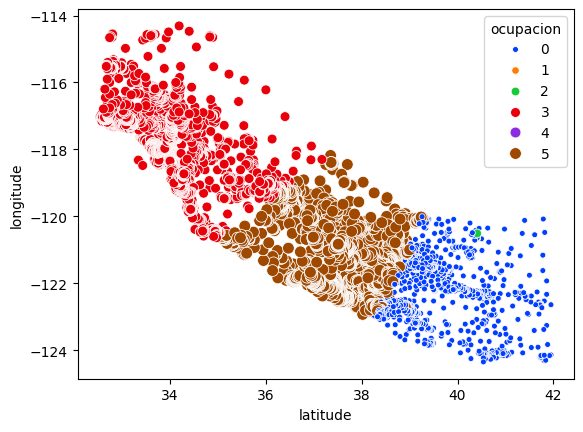

In [56]:
x2['ocupacion'] = predictions2
sb.scatterplot(x='latitude', y='longitude', data=x2, hue='ocupacion', palette='bright', size='ocupacion')